In [1]:
##Imports 

import os
import numpy as np
import pandas as pd
import librosa
import random
import librosa.display
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
#os.environ['TF_CPP_MIN_LOG_LEVEL']='2'
##Keras

#import keras
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dropout,Average
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.sequence import pad_sequences

from keras.models import Model
#from keras.layers.conlutional import Conv1D
from keras import regularizers
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping
from keras.callbacks import  History, ReduceLROnPlateau, CSVLogger
#from keras.models import Model, Sequential
#from keras.layers import Dense, Embedding, LSTM, Add,Average
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
#from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.preprocessing import sequence
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.utils import np_utils
from keras.utils import to_categorical

#from keras.models import Model, Sequential
from keras import optimizers
from keras.layers import Input, Conv1D, Conv2D,BatchNormalization, MaxPooling1D,MaxPooling2D, LSTM, Dense, Activation, Layer,Reshape,Concatenate

from keras.utils import to_categorical
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model


from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from sklearn.utils import shuffle
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

from sklearn import (manifold, datasets, decomposition, ensemble,
             discriminant_analysis, random_projection)

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

import matplotlib.patheffects as pe
from sklearn.manifold import TSNE 
import seaborn as sns


In [2]:
## Reading files
files=os.listdir('E:/Audio_full/')
## Data sets
# - RAVDESS Both speech and song with 8 emotions 2364 files in total with 24 actors each
# - TESS 7 emotions 2800 files in total
# - SAVEE 4 Actors 480 files in total

In [3]:
#pip install seaborn

In [4]:
#conda activate tensorflow-gpu

In [5]:
#Feeling dataset of corresponding audio

feeling_list=[]
for item in files:
    if item[6:-16]=='01' or item[2]=='n' or item[-11:-4]=='neutral' or item[6:-16]=='02':
        feeling_list.append('neutral')
    #elif :
        #feeling_list.append('calm')
    elif item[6:-16]=='03' or item[2]=='h' or item[-9:-4]=='happy':
        feeling_list.append('happy')
    elif item[6:-16]=='04' or item[2:4]=='sa' or item[-7:-4]=='sad':
        feeling_list.append('sad')
    elif item[6:-16]=='05' or item[2]=='a' or item[-9:-4]=='angry':
        feeling_list.append('angry')
    elif item[6:-16]=='07' or item[2]=='d' or item[-11:-4]=='disgust':
        feeling_list.append('disgust')
    elif item[6:-16]=='06' or item[2]=='f'or item[-8:-4]=='fear':
        feeling_list.append('fear')
    elif item[6:-16]=='08' or item[2:4]=='su' or item[-6:-4]=='ps':
        feeling_list.append('surprised')

In [6]:
labels = pd.DataFrame(feeling_list,columns=['emotions'])
labels

,emotions
0,neutral
1,neutral
2,neutral
3,neutral
4,neutral
...,...
5639,fear
5640,happy
5641,neutral
5642,surprised


In [7]:
## Converting the audio to data using MFCC PART 1
df = pd.DataFrame(columns=['feature'])
bookmark=0
for index,y in enumerate(files):
    X, sample_rate = librosa.load('E:/Audio_full/'+y, res_type='kaiser_fast')
    sample_rate = np.array(sample_rate)
    mfccs = np.mean(librosa.feature.mfcc(y=X,sr=sample_rate, n_mfcc=50).T,axis=0)
    feature = mfccs
    df.loc[bookmark] = [feature]
    bookmark=bookmark+1
df

,feature
0,"[-700.3989, 58.63021, -3.025852, 16.040241, 4...."
1,"[-653.169, 58.028076, -12.581207, 11.818786, -..."
2,"[-617.0523, 60.10337, -5.9842577, 13.886285, 1..."
3,"[-698.7211, 47.088486, -11.333614, 12.963088, ..."
4,"[-715.9226, 71.9768, 4.457525, 18.602499, 8.40..."
...,...
5639,"[-343.40387, 32.59755, -9.197987, 25.315773, 0..."
5640,"[-345.47714, 24.427338, -14.398651, 36.95299, ..."
5641,"[-416.72632, 71.14924, -1.1160216, 42.52479, -..."
5642,"[-374.82407, 46.681873, -12.381617, 18.139084,..."


In [8]:
df2=pd.DataFrame(df['feature'].values.tolist())
df2=df2.fillna(0)
df2

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-700.398926,58.630211,-3.025852,16.040241,4.248529,3.869935,-6.381716,-0.188635,-13.735005,-0.319724,...,-3.432791,-1.268412,-2.037442,-3.208719,-2.298195,-2.391170,-2.533661,-0.790085,-2.240257,-1.202297
1,-653.169006,58.028076,-12.581207,11.818786,-7.681562,-0.617142,-8.337758,-5.823570,-6.547592,1.458057,...,-0.561838,-0.344248,-0.597152,-2.483091,-2.482294,-1.513263,-0.206973,-2.042859,-2.453341,-2.000150
2,-617.052307,60.103371,-5.984258,13.886285,1.120427,0.511750,-14.841358,-4.016369,-5.575839,-6.309851,...,3.856137,2.830290,0.607302,-0.470186,0.242361,-0.506050,0.155130,1.041393,0.215989,0.503251
3,-698.721130,47.088486,-11.333614,12.963088,-8.005651,-1.252229,-10.009068,-9.434125,-10.318875,-0.864674,...,3.345852,-0.199447,0.761450,0.445034,0.017971,-0.074606,-0.224912,-1.751279,-0.997531,0.558003
4,-715.922607,71.976799,4.457525,18.602499,8.404046,3.621954,-1.974365,0.022672,-2.678083,4.232803,...,0.427559,0.132589,-1.459148,-2.129129,-1.101375,1.795965,2.756026,1.120542,1.270001,1.677747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,-343.403870,32.597549,-9.197987,25.315773,0.052862,0.853997,-11.733653,0.140329,-25.528193,4.334096,...,6.829886,1.623786,0.174217,-2.333187,0.229022,-2.646233,-0.123384,2.442371,1.630154,-2.707299
5640,-345.477142,24.427338,-14.398651,36.952991,-7.297604,1.008584,-15.700944,-10.525764,-6.183089,-6.078100,...,-1.621850,-5.776743,-3.046839,0.392119,0.650877,1.291245,0.535487,2.879143,0.849994,-6.130474
5641,-416.726318,71.149239,-1.116022,42.524792,-6.296183,2.258823,-6.628646,-7.701837,-10.190816,7.239936,...,7.608363,6.693035,-1.709971,-7.858405,-4.653687,2.703166,4.437060,-1.495853,-8.279791,-6.083230
5642,-374.824066,46.681873,-12.381617,18.139084,-22.662424,4.170814,-15.546303,-7.580999,-18.976576,6.013675,...,1.192490,1.591670,1.171150,0.643918,0.412878,-1.108500,1.322803,-0.409489,1.067348,-0.033086


In [9]:
#MEL spectogram part2
dfmelSp = pd.DataFrame(columns=['feature1'])
bookmark=0
for index,y in enumerate(files):
    X, sample_rate = librosa.load('E:/Audio_full/'+y,res_type='kaiser_fast')
    sample_rate = np.array(sample_rate)
    mel= np.mean(librosa.feature.melspectrogram(y=X,sr=sample_rate).T,axis=0)
    feature = mel
    dfmelSp.loc[bookmark] = [feature]
    bookmark=bookmark+1
dfmelSp

,feature1
0,"[1.3591023e-06, 5.603021e-05, 0.003625807, 0.0..."
1,"[1.2332691e-05, 5.2230745e-05, 0.00011250672, ..."
2,"[2.6729702e-05, 0.00019209618, 0.0007873292, 0..."
3,"[6.656757e-06, 9.897744e-06, 1.4620192e-05, 7...."
4,"[0.00011870869, 0.00011706894, 0.0011368697, 0..."
...,...
5639,"[0.088534385, 0.032074165, 0.01548406, 0.01437..."
5640,"[0.0037470474, 0.0011213432, 0.0011808255, 0.0..."
5641,"[0.009096331, 0.0084486315, 0.008483385, 0.009..."
5642,"[0.019076487, 0.001114162, 0.0003238535, 0.000..."


In [10]:
dfmelSp2=pd.DataFrame(dfmelSp['feature1'].values.tolist())
dfmelSp2=dfmelSp2.fillna(0)
dfmelSp2

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,0.000001,0.000056,0.003626,0.020956,0.031414,0.017692,0.003454,0.018618,0.024684,0.020465,...,0.000002,0.000002,0.000001,6.755617e-07,3.586787e-07,3.909842e-07,2.609652e-07,6.226127e-08,1.362780e-08,1.109996e-09
1,0.000012,0.000052,0.000113,0.000077,0.000056,0.000892,0.010611,0.067382,0.132326,0.016235,...,0.000013,0.000009,0.000007,3.351835e-06,2.065444e-06,5.446865e-07,2.222711e-07,7.489701e-08,1.204194e-08,1.612842e-09
2,0.000027,0.000192,0.000787,0.002619,0.005716,0.046933,0.067469,0.030527,0.016795,0.009505,...,0.000045,0.000035,0.000022,1.127173e-05,6.057411e-06,2.383926e-06,1.396174e-06,7.454358e-07,1.715608e-07,2.231222e-08
3,0.000007,0.000010,0.000015,0.000008,0.000015,0.003372,0.008763,0.014438,0.032546,0.021561,...,0.000031,0.000026,0.000020,7.791955e-06,5.814118e-06,1.717594e-06,7.783661e-07,1.526976e-07,2.095097e-08,2.928901e-09
4,0.000119,0.000117,0.001137,0.003581,0.013649,0.008650,0.001231,0.002388,0.004787,0.014026,...,0.000003,0.000002,0.000002,9.353384e-07,4.004243e-07,2.418668e-07,7.589256e-08,2.278530e-08,4.165693e-09,3.284917e-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,0.088534,0.032074,0.015484,0.014378,0.005388,0.002551,0.009657,0.521248,2.002649,0.849206,...,0.004074,0.003433,0.003914,3.691630e-03,1.624443e-03,3.285170e-04,2.007679e-04,6.891089e-05,2.034424e-05,3.410880e-06
5640,0.003747,0.001121,0.001181,0.001105,0.000706,0.001211,0.266760,2.143342,3.968316,3.609105,...,0.005176,0.005318,0.003357,2.874391e-03,2.240580e-03,6.783053e-04,1.343765e-04,7.181308e-05,3.513732e-05,1.744838e-05
5641,0.009096,0.008449,0.008483,0.009777,0.008108,0.011599,2.562184,7.563576,0.340539,0.011818,...,0.001646,0.002988,0.003047,2.352791e-03,9.355015e-04,1.696493e-04,5.026917e-05,1.020348e-05,4.442834e-06,4.414226e-07
5642,0.019076,0.001114,0.000324,0.000266,0.000249,0.001760,0.104751,0.308540,0.358288,0.242882,...,0.001825,0.002067,0.002671,1.932580e-03,1.206304e-03,1.850308e-04,8.864246e-05,1.673799e-05,6.823322e-06,6.962310e-07


In [11]:
newdf=pd.concat([df2,labels,dfmelSp2],axis=1)
newdf['emotions']
newdf[49]


0         neutral
1         neutral
2         neutral
3         neutral
4         neutral
          ...    
5639         fear
5640        happy
5641      neutral
5642    surprised
5643          sad
Name: emotions, Length: 5644, dtype: object

,49,49
0,-1.202297,0.000644
1,-2.000150,0.005754
2,0.503251,0.003092
3,0.558003,0.000424
4,1.677747,0.000418
...,...,...
5639,-2.707299,2.584399
5640,-6.130474,0.004410
5641,-6.083230,0.001173
5642,-0.033086,0.035044


In [12]:
newdf=shuffle(newdf)
newdf.shape
newdf

(5644, 179)

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
4458,-438.871460,82.435272,7.511552,38.116982,-6.677121,6.543684,-10.281522,-6.692842,-9.008232,10.752490,...,0.001623,0.001690,1.350988e-03,6.948730e-04,2.018240e-04,6.785328e-05,3.122036e-05,7.071362e-06,1.703625e-06,1.301245e-07
3804,-476.700897,91.397888,8.905906,1.676016,3.645423,9.743506,-11.389336,4.310838,-25.428411,3.543940,...,0.000581,0.000255,1.036277e-04,6.982608e-05,3.784794e-05,1.275509e-05,3.150841e-06,5.185627e-07,6.816642e-08,8.921474e-09
770,-340.366547,48.208565,-24.272551,16.078091,-17.231918,2.954507,-11.073486,-10.821574,-9.621379,-2.812316,...,0.011214,0.010634,6.274979e-03,2.771236e-03,1.702752e-03,1.018020e-03,5.103717e-04,1.078034e-04,1.954592e-05,1.873797e-06
4865,-334.862732,53.033081,-17.412251,5.158654,-31.316618,0.114460,-19.336908,-11.721533,-16.323507,9.691947,...,0.005952,0.006350,6.139408e-03,4.519479e-03,1.959518e-03,3.768304e-04,1.924915e-04,3.525245e-05,9.745805e-06,1.260260e-06
2385,-398.795319,96.047089,27.141220,33.961594,13.371781,8.662976,-9.413886,-0.938068,3.910770,-9.012038,...,0.000002,0.000002,2.080993e-06,2.279521e-06,2.441805e-06,2.553624e-06,2.611637e-06,2.601697e-06,2.558558e-06,2.511823e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194,-466.776337,33.645042,-17.367523,13.745011,-18.151030,0.476726,-15.648373,-5.762230,-12.020210,-4.652709,...,0.000478,0.000518,4.319597e-04,2.112275e-04,1.442935e-04,6.828632e-05,2.774122e-05,8.686913e-06,2.009549e-06,2.155420e-07
4807,-320.464508,34.025284,-16.271944,34.948364,-17.154434,0.478458,-13.669361,-8.953582,-9.476963,-6.101535,...,0.004186,0.003652,3.249410e-03,2.978972e-03,1.290746e-03,3.203395e-04,1.019157e-04,4.926507e-05,1.580130e-05,2.812962e-06
4020,-393.032349,59.229885,-15.116005,1.016659,-18.473946,5.422569,-26.646086,-4.510539,-19.206387,0.530242,...,0.000267,0.000351,2.568730e-04,1.742838e-04,6.450406e-05,2.853448e-05,1.353009e-05,3.777699e-06,6.072335e-07,8.242208e-08
2666,-405.978912,107.061768,31.556339,40.077660,2.951005,-13.124174,5.861604,2.698900,-4.866779,1.311889,...,0.000004,0.000003,4.526776e-07,3.128299e-07,3.243662e-07,3.383111e-07,3.451050e-07,3.429797e-07,3.364807e-07,3.299970e-07


In [13]:
#newdf.to_csv(r'E:\Fusion.csv',index=True,header=True)

In [14]:
y =newdf['emotions']
x=newdf.iloc[:,0:50]
x1=newdf.iloc[:,51:179]
x.shape,y.shape,x1.shape


##################### To be modified with

#newdf1 = np.random.rand(len(rnewdf)) < 0.8
#train = rnewdf[newdf1]
#test = rnewdf[~newdf1]

((5644, 50), (5644,), (5644, 128))

In [15]:
# For MFCC
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.20,shuffle=False)
x_traincnn = np.expand_dims(X_train, axis=2)
x_testcnn = np.expand_dims(X_test, axis=2)

In [16]:
# For MFCC
## CNN

#model = Sequential()

#model.add(Conv1D(64, 5,padding='same',input_shape=(50,1)))
#model.add(Activation('relu'))
#model.add(Dropout(0.1))
#model.add(MaxPooling1D(pool_size=(4)))
#model.add(Conv1D(128, 5,padding='same',))
#model.add(Activation('relu'))
#model.add(Dropout(0.1))
#model.add(MaxPooling1D(pool_size=(4)))
#model.add(Conv1D(256, 5,padding='same',))
#model.add(Activation('relu'))
#model.add(Dropout(0.1))
#model.add(Flatten())
#model.add(Dense(7))
#model.add(Activation('softmax'))
opt = keras.optimizers.RMSprop(lr=0.00005, rho=0.9, epsilon=1e-07, decay=0.0)
#def model(inputs):
inputs=keras.Input(shape=(50,1))
conv1=Conv1D(64,kernel_size=3)(inputs)
acti1=Dense(64,activation="relu")(conv1)
drop1=Dropout(0.1)(acti1)
maxPool1=MaxPooling1D(pool_size=(4))(drop1)
conv2=Conv1D(128,kernel_size=3)(maxPool1)
acti2=Dense(128,activation="relu")(conv2)
drop2=Dropout(0.1)(acti2)
maxPool2=MaxPooling1D(pool_size=(4))(drop2)
conv3=Conv1D(256,kernel_size=2)(maxPool2)
acti3=Dense(256,activation="relu")(conv3)
drop3=Dropout(0.1)(acti3)
#flat=Flatten()(drop3)

flat=Flatten()(drop3)
acti4=Dense(7,activation="softmax")(flat)
#drop4=Dropout(0.1)(acti4)

#flat1=Flatten()(drop4)
#dens1=Dense(7)
#acti5=Dense(7,activation="softmax")(acti4)

model=Model(inputs=inputs,outputs=acti4)

In [17]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 50, 1)]           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 48, 64)            256       
_________________________________________________________________
dense (Dense)                (None, 48, 64)            4160      
_________________________________________________________________
dropout (Dropout)            (None, 48, 64)            0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 12, 64)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 10, 128)           24704     
_________________________________________________________________
dense_1 (Dense)              (None, 10, 128)           16512 

In [18]:
model.compile(loss='sparse_categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

In [19]:
## Converting emotions to int values MFCC
y_traincnn=[]
for lab in y_train:
    if lab=='neutral':
        y_traincnn.append(0)
    #elif lab=='calm':
        #y_traincnn.append(2)
    elif lab=='happy':
        y_traincnn.append(1)
    elif lab=='sad':
        y_traincnn.append(2)
    elif lab=='angry':
        y_traincnn.append(3)
    elif lab=='fear':
        y_traincnn.append(4)
    elif lab=='disgust':
        y_traincnn.append(5)
    elif lab=='surprised':
        y_traincnn.append(6)
y_traincnn=np.asarray(y_traincnn)
y_testcnn=[]
for lab in y_test:
    if lab=='neutral':
        y_testcnn.append(0)
    #elif lab=='calm':
        #y_testcnn.append(2)
    elif lab=='happy':
        y_testcnn.append(1)
    elif lab=='sad':
        y_testcnn.append(2)
    elif lab=='angry':
        y_testcnn.append(3)
    elif lab=='fear':
        y_testcnn.append(4)
    elif lab=='disgust':
        y_testcnn.append(5)
    elif lab=='surprised':
        y_testcnn.append(6)
y_testcnn=np.asarray(y_testcnn)

In [20]:
## Start CNN MFCC
cnn=model.fit(x_traincnn, y_traincnn, batch_size=16, epochs=500, validation_data=(x_testcnn, y_testcnn))

Epoch 1/500
283/283 [==============================] - 3s 8ms/step - loss: 3.6224 - accuracy: 0.1859 - val_loss: 1.6052 - val_accuracy: 0.3206
Epoch 2/500
283/283 [==============================] - 1s 4ms/step - loss: 1.7044 - accuracy: 0.3883 - val_loss: 1.3039 - val_accuracy: 0.5421
Epoch 3/500
283/283 [==============================] - 1s 4ms/step - loss: 1.3990 - accuracy: 0.4864 - val_loss: 1.1722 - val_accuracy: 0.6129
Epoch 4/500
283/283 [==============================] - 1s 4ms/step - loss: 1.2062 - accuracy: 0.5613 - val_loss: 1.0835 - val_accuracy: 0.6120
Epoch 5/500
283/283 [==============================] - 1s 4ms/step - loss: 1.0935 - accuracy: 0.5925 - val_loss: 1.0145 - val_accuracy: 0.6563
Epoch 6/500
283/283 [==============================] - 1s 4ms/step - loss: 1.0286 - accuracy: 0.6280 - val_loss: 1.0136 - val_accuracy: 0.6439
Epoch 7/500
283/283 [==============================] - 1s 4ms/step - loss: 0.9756 - accuracy: 0.6342 - val_loss: 0.9873 - val_accuracy: 0.6608

Epoch 58/500
283/283 [==============================] - 1s 4ms/step - loss: 0.4842 - accuracy: 0.8148 - val_loss: 0.6012 - val_accuracy: 0.7777
Epoch 59/500
283/283 [==============================] - 1s 4ms/step - loss: 0.4654 - accuracy: 0.8336 - val_loss: 0.6268 - val_accuracy: 0.7635
Epoch 60/500
283/283 [==============================] - 1s 4ms/step - loss: 0.5023 - accuracy: 0.8108 - val_loss: 0.6084 - val_accuracy: 0.7768
Epoch 61/500
283/283 [==============================] - 1s 4ms/step - loss: 0.4540 - accuracy: 0.8367 - val_loss: 0.6228 - val_accuracy: 0.7688
Epoch 62/500
283/283 [==============================] - 1s 4ms/step - loss: 0.4755 - accuracy: 0.8133 - val_loss: 0.6246 - val_accuracy: 0.7803
Epoch 63/500
283/283 [==============================] - 1s 4ms/step - loss: 0.4584 - accuracy: 0.8257 - val_loss: 0.6318 - val_accuracy: 0.7644
Epoch 64/500
283/283 [==============================] - 1s 4ms/step - loss: 0.4495 - accuracy: 0.8271 - val_loss: 0.6022 - val_accuracy:

Epoch 115/500
283/283 [==============================] - 1s 4ms/step - loss: 0.3453 - accuracy: 0.8718 - val_loss: 0.5799 - val_accuracy: 0.7936
Epoch 116/500
283/283 [==============================] - 1s 4ms/step - loss: 0.3429 - accuracy: 0.8669 - val_loss: 0.5485 - val_accuracy: 0.8007
Epoch 117/500
283/283 [==============================] - 1s 4ms/step - loss: 0.3421 - accuracy: 0.8753 - val_loss: 0.5483 - val_accuracy: 0.7981
Epoch 118/500
283/283 [==============================] - 1s 4ms/step - loss: 0.3265 - accuracy: 0.8821 - val_loss: 0.5493 - val_accuracy: 0.8025
Epoch 119/500
283/283 [==============================] - 1s 4ms/step - loss: 0.3242 - accuracy: 0.8841 - val_loss: 0.5782 - val_accuracy: 0.7910
Epoch 120/500
283/283 [==============================] - 1s 4ms/step - loss: 0.3386 - accuracy: 0.8710 - val_loss: 0.5767 - val_accuracy: 0.7998
Epoch 121/500
283/283 [==============================] - 1s 4ms/step - loss: 0.3005 - accuracy: 0.8831 - val_loss: 0.5685 - val_ac

283/283 [==============================] - 1s 4ms/step - loss: 0.2400 - accuracy: 0.9159 - val_loss: 0.5602 - val_accuracy: 0.8158
Epoch 172/500
283/283 [==============================] - 1s 4ms/step - loss: 0.2409 - accuracy: 0.9136 - val_loss: 0.5359 - val_accuracy: 0.8264
Epoch 173/500
283/283 [==============================] - 1s 4ms/step - loss: 0.2238 - accuracy: 0.9145 - val_loss: 0.5761 - val_accuracy: 0.8122
Epoch 174/500
283/283 [==============================] - 1s 4ms/step - loss: 0.2396 - accuracy: 0.9091 - val_loss: 0.5736 - val_accuracy: 0.8193
Epoch 175/500
283/283 [==============================] - 1s 4ms/step - loss: 0.2345 - accuracy: 0.9179 - val_loss: 0.5755 - val_accuracy: 0.8113
Epoch 176/500
283/283 [==============================] - 1s 4ms/step - loss: 0.2359 - accuracy: 0.9148 - val_loss: 0.5740 - val_accuracy: 0.7998
Epoch 177/500
283/283 [==============================] - 1s 4ms/step - loss: 0.2275 - accuracy: 0.9150 - val_loss: 0.5340 - val_accuracy: 0.8273

283/283 [==============================] - 1s 4ms/step - loss: 0.1602 - accuracy: 0.9364 - val_loss: 0.5810 - val_accuracy: 0.8237
Epoch 228/500
283/283 [==============================] - 1s 4ms/step - loss: 0.1751 - accuracy: 0.9373 - val_loss: 0.5745 - val_accuracy: 0.8246
Epoch 229/500
283/283 [==============================] - 1s 4ms/step - loss: 0.1924 - accuracy: 0.9275 - val_loss: 0.5682 - val_accuracy: 0.8335
Epoch 230/500
283/283 [==============================] - 1s 4ms/step - loss: 0.1514 - accuracy: 0.9505 - val_loss: 0.5890 - val_accuracy: 0.8184
Epoch 231/500
283/283 [==============================] - 1s 4ms/step - loss: 0.2036 - accuracy: 0.9311 - val_loss: 0.6062 - val_accuracy: 0.8246
Epoch 232/500
283/283 [==============================] - 1s 4ms/step - loss: 0.1729 - accuracy: 0.9366 - val_loss: 0.5643 - val_accuracy: 0.8415
Epoch 233/500
283/283 [==============================] - 1s 4ms/step - loss: 0.1676 - accuracy: 0.9358 - val_loss: 0.5867 - val_accuracy: 0.8308

283/283 [==============================] - 1s 4ms/step - loss: 0.1353 - accuracy: 0.9524 - val_loss: 0.6030 - val_accuracy: 0.8308
Epoch 284/500
283/283 [==============================] - 1s 4ms/step - loss: 0.1378 - accuracy: 0.9523 - val_loss: 0.5908 - val_accuracy: 0.8432
Epoch 285/500
283/283 [==============================] - 1s 4ms/step - loss: 0.1168 - accuracy: 0.9599 - val_loss: 0.5887 - val_accuracy: 0.8423
Epoch 286/500
283/283 [==============================] - 1s 4ms/step - loss: 0.1283 - accuracy: 0.9523 - val_loss: 0.6306 - val_accuracy: 0.8361
Epoch 287/500
283/283 [==============================] - 1s 4ms/step - loss: 0.1290 - accuracy: 0.9524 - val_loss: 0.6111 - val_accuracy: 0.8370
Epoch 288/500
283/283 [==============================] - 1s 4ms/step - loss: 0.1416 - accuracy: 0.9506 - val_loss: 0.5832 - val_accuracy: 0.8397
Epoch 289/500
283/283 [==============================] - 1s 4ms/step - loss: 0.1300 - accuracy: 0.9557 - val_loss: 0.6142 - val_accuracy: 0.8291

283/283 [==============================] - 1s 4ms/step - loss: 0.1134 - accuracy: 0.9611 - val_loss: 0.6661 - val_accuracy: 0.8335
Epoch 340/500
283/283 [==============================] - 1s 5ms/step - loss: 0.1230 - accuracy: 0.9594 - val_loss: 0.6389 - val_accuracy: 0.8459
Epoch 341/500
283/283 [==============================] - 1s 4ms/step - loss: 0.1087 - accuracy: 0.9642 - val_loss: 0.6342 - val_accuracy: 0.8353
Epoch 342/500
283/283 [==============================] - 1s 5ms/step - loss: 0.1102 - accuracy: 0.9628 - val_loss: 0.6471 - val_accuracy: 0.8485
Epoch 343/500
283/283 [==============================] - 1s 4ms/step - loss: 0.0973 - accuracy: 0.9660 - val_loss: 0.6758 - val_accuracy: 0.8335
Epoch 344/500
283/283 [==============================] - 1s 4ms/step - loss: 0.1125 - accuracy: 0.9624 - val_loss: 0.6223 - val_accuracy: 0.8521
Epoch 345/500
283/283 [==============================] - 1s 5ms/step - loss: 0.1103 - accuracy: 0.9624 - val_loss: 0.6324 - val_accuracy: 0.8379

283/283 [==============================] - 1s 4ms/step - loss: 0.0768 - accuracy: 0.9762 - val_loss: 0.6815 - val_accuracy: 0.8406
Epoch 396/500
283/283 [==============================] - 1s 4ms/step - loss: 0.0975 - accuracy: 0.9655 - val_loss: 0.7324 - val_accuracy: 0.8299
Epoch 397/500
283/283 [==============================] - 1s 4ms/step - loss: 0.0885 - accuracy: 0.9733 - val_loss: 0.7146 - val_accuracy: 0.8388
Epoch 398/500
283/283 [==============================] - 1s 4ms/step - loss: 0.1066 - accuracy: 0.9653 - val_loss: 0.6736 - val_accuracy: 0.8450
Epoch 399/500
283/283 [==============================] - 1s 4ms/step - loss: 0.0919 - accuracy: 0.9694 - val_loss: 0.6722 - val_accuracy: 0.8432
Epoch 400/500
283/283 [==============================] - 1s 4ms/step - loss: 0.0828 - accuracy: 0.9712 - val_loss: 0.7193 - val_accuracy: 0.8361
Epoch 401/500
283/283 [==============================] - 1s 4ms/step - loss: 0.0956 - accuracy: 0.9714 - val_loss: 0.6859 - val_accuracy: 0.8450

283/283 [==============================] - 1s 4ms/step - loss: 0.0837 - accuracy: 0.9766 - val_loss: 0.7399 - val_accuracy: 0.8459
Epoch 452/500
283/283 [==============================] - 1s 4ms/step - loss: 0.0906 - accuracy: 0.9686 - val_loss: 0.7094 - val_accuracy: 0.8423
Epoch 453/500
283/283 [==============================] - 1s 4ms/step - loss: 0.0826 - accuracy: 0.9690 - val_loss: 0.7593 - val_accuracy: 0.8291
Epoch 454/500
283/283 [==============================] - 1s 4ms/step - loss: 0.0811 - accuracy: 0.9690 - val_loss: 0.7690 - val_accuracy: 0.8335
Epoch 455/500
283/283 [==============================] - 1s 4ms/step - loss: 0.0858 - accuracy: 0.9738 - val_loss: 0.7320 - val_accuracy: 0.8450
Epoch 456/500
283/283 [==============================] - 1s 4ms/step - loss: 0.0740 - accuracy: 0.9713 - val_loss: 0.7756 - val_accuracy: 0.8406
Epoch 457/500
283/283 [==============================] - 1s 4ms/step - loss: 0.0796 - accuracy: 0.9657 - val_loss: 0.7192 - val_accuracy: 0.8441

Text(0.5, 1.0, 'loss per epoch')

Text(0, 0.5, 'loss')

Text(0.5, 0, 'epoch')

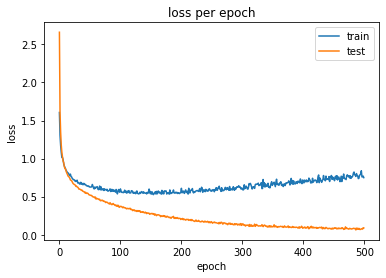

In [21]:
plt.plot(cnn.history['val_loss'])
plt.plot(cnn.history['loss'])
plt.title('loss per epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

Text(0.5, 1.0, 'accuracy per epoch')

Text(0, 0.5, 'accuracy')

Text(0.5, 0, 'epoch')

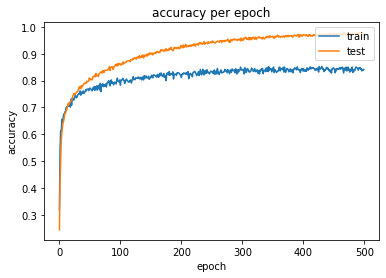

In [22]:
plt.plot(cnn.history['val_accuracy'])
plt.plot(cnn.history['accuracy'])
plt.title('accuracy per epoch')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [69]:
predictions = model.predict(x_testcnn)
predictions
#np.argmax(model.predict(x_testcnn),axis=-1)

array([[1.5394879e-02, 2.3054196e-01, 6.3529503e-01, ..., 1.8365854e-02,
        8.7194562e-02, 6.6938819e-03],
       [1.3820245e-13, 5.0996787e-05, 1.8436233e-09, ..., 3.2378500e-06,
        3.9719836e-08, 9.9994576e-01],
       [8.0045528e-04, 2.0258908e-01, 4.7557267e-05, ..., 3.2412533e-03,
        7.9092795e-01, 1.9159960e-03],
       ...,
       [4.6633680e-22, 1.9957492e-14, 3.3487295e-28, ..., 3.1295509e-20,
        1.5612666e-19, 9.5369403e-30],
       [9.8097366e-01, 8.2973876e-16, 1.9026320e-02, ..., 1.9723562e-19,
        5.5108287e-09, 5.9817152e-18],
       [1.5139193e-18, 1.0000000e+00, 1.0883338e-23, ..., 4.9604886e-17,
        8.7501177e-23, 3.9291049e-12]], dtype=float32)

In [24]:
y_testcnn
y_traincnn

array([3, 6, 2, ..., 3, 0, 1])

array([0, 5, 3, ..., 4, 1, 6])

In [70]:
from sklearn.metrics import classification_report
report = classification_report(y_testcnn, predictions)
#print(report)
# 0 = neutral,1 = happy, 2 = sad, 3 = angry, 4 = fear, 5 = digust, 6 = surprised,

ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets

In [26]:
loss, acc = model.evaluate(x_testcnn, y_testcnn)
print("model, accuracy: {:5.2f}%".format(100*acc))

36/36 [==============================] - 0s 2ms/step - loss: 0.7498 - accuracy: 0.8415
model, accuracy: 84.15%


In [27]:
from sklearn.manifold import TSNE
tsne = TSNE(learning_rate=200.0, n_iter=2000,perplexity=25.0)

In [37]:
tsne_MFfeatures=tsne.fit_transform(model.predict(x))
tsne_MFfeatures.shape
tsne_MFfeatures[:,0]

(5644, 2)

array([-55.516815, -57.16091 ,  20.926033, ...,  -7.712479, -46.477184,
        52.321465], dtype=float32)

<AxesSubplot:>

<function matplotlib.pyplot.show(close=None, block=None)>

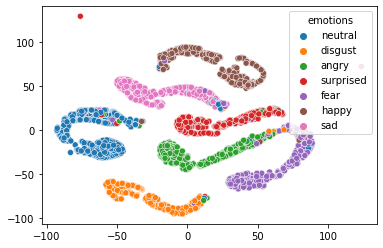

In [38]:
sns.scatterplot(x=tsne_MFfeatures[:,0],y=tsne_MFfeatures[:,1],hue=y,data=model.predict(x))
plt.show

In [ ]:
#model.save('E:/testingMFCC_model.h5')
#print("CNN MFCC MODEL SAVED")

In [ ]:
from keras import backend as K

outputLayer=model.layers[13].output
model.predict(x_traincnn).round(1)

In [39]:
## MEL CNN PART STARTS


Xmel_train, Xmel_test, ymel_train, ymel_test = train_test_split(x1,y, test_size = 0.20,shuffle=False)
xmel_traincnn = np.expand_dims(Xmel_train, axis=2)
xmel_testcnn = np.expand_dims(Xmel_test, axis=2)



##################### To be modified with

#newdf1 = np.random.rand(len(rnewdf)) < 0.8
#train = rnewdf[newdf1]
#test = rnewdf[~newdf1]

In [40]:
## MEL CNN model
#modelMel = Sequential()

#modelMel.add(Conv1D(64, 5,padding='same',input_shape=(128,1)))
#modelMel.add(Activation('relu'))
#modelMel.add(Dropout(0.1))
#modelMel.add(MaxPooling1D(pool_size=(4)))
#modelMel.add(Conv1D(128, 5,padding='same',))
#modelMel.add(Activation('relu'))
#modelMel.add(Dropout(0.1))
#modelMel.add(MaxPooling1D(pool_size=(4)))
#modelMel.add(Conv1D(256, 5,padding='same',))
#modelMel.add(Activation('relu'))
#modelMel.add(Dropout(0.1))
#modelMel.add(Flatten())
#modelMel.add(Dense(7))
#modelMel.add(Activation('softmax'))
opt = keras.optimizers.RMSprop(lr=0.00005, rho=0.9, epsilon=1e-07, decay=0.0)

inputs=keras.Input(shape=(128,1))
conv1=Conv1D(64,kernel_size=3)(inputs)
acti1=Dense(64,activation="relu")(conv1)
drop1=Dropout(0.1)(acti1)
maxPool1=MaxPooling1D(pool_size=(4))(drop1)
conv2=Conv1D(128,kernel_size=3)(maxPool1)
acti2=Dense(128,activation="relu")(conv2)
drop2=Dropout(0.1)(acti2)
maxPool2=MaxPooling1D(pool_size=(4))(drop2)
conv3=Conv1D(256,kernel_size=2)(maxPool2)
acti3=Dense(256,activation="relu")(conv3)
drop3=Dropout(0.1)(acti3)

flat=Flatten()(drop3)
acti4=Dense(7,activation="softmax")(flat)
#drop4=Dropout(0.1)(acti4)

#flat1=Flatten()(drop4)
#acti5=Dense(7,activation="softmax")(acti4)

modelMel=Model(inputs=inputs,outputs=acti4)

In [41]:
modelMel.compile(loss='sparse_categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

In [42]:
ymel_traincnn=[]
for lab in ymel_train:
    if lab=='neutral':
        ymel_traincnn.append(0)
    #elif lab=='calm':
        #y_traincnn.append(2)
    elif lab=='happy':
        ymel_traincnn.append(1)
    elif lab=='sad':
        ymel_traincnn.append(2)
    elif lab=='angry':
        ymel_traincnn.append(3)
    elif lab=='fear':
        ymel_traincnn.append(4)
    elif lab=='disgust':
        ymel_traincnn.append(5)
    elif lab=='surprised':
        ymel_traincnn.append(6)
ymel_traincnn=np.asarray(ymel_traincnn)
ymel_testcnn=[]
for lab in ymel_test:
    if lab=='neutral':
        ymel_testcnn.append(0)
    #elif lab=='calm':
        #y_testcnn.append(2)
    elif lab=='happy':
        ymel_testcnn.append(1)
    elif lab=='sad':
        ymel_testcnn.append(2)
    elif lab=='angry':
        ymel_testcnn.append(3)
    elif lab=='fear':
        ymel_testcnn.append(4)
    elif lab=='disgust':
        ymel_testcnn.append(5)
    elif lab=='surprised':
        ymel_testcnn.append(6)
ymel_testcnn=np.asarray(ymel_testcnn)

In [43]:
## Start CNN
cnn1=modelMel.fit(xmel_traincnn, ymel_traincnn, batch_size=16, epochs=500, validation_data=(xmel_testcnn, ymel_testcnn))

Epoch 1/500
283/283 [==============================] - 3s 7ms/step - loss: 1.9609 - accuracy: 0.2644 - val_loss: 1.8629 - val_accuracy: 0.3109
Epoch 2/500
283/283 [==============================] - 2s 6ms/step - loss: 1.8642 - accuracy: 0.3095 - val_loss: 1.8068 - val_accuracy: 0.3074
Epoch 3/500
283/283 [==============================] - 2s 6ms/step - loss: 1.7882 - accuracy: 0.3230 - val_loss: 1.7580 - val_accuracy: 0.3020
Epoch 4/500
283/283 [==============================] - 2s 7ms/step - loss: 1.7050 - accuracy: 0.3479 - val_loss: 1.7114 - val_accuracy: 0.3277
Epoch 5/500
283/283 [==============================] - 2s 6ms/step - loss: 1.6686 - accuracy: 0.3782 - val_loss: 1.7091 - val_accuracy: 0.3711
Epoch 6/500
283/283 [==============================] - 2s 6ms/step - loss: 1.6013 - accuracy: 0.4067 - val_loss: 1.6371 - val_accuracy: 0.4012
Epoch 7/500
283/283 [==============================] - 2s 7ms/step - loss: 1.5818 - accuracy: 0.4563 - val_loss: 1.6201 - val_accuracy: 0.4101

Epoch 58/500
283/283 [==============================] - 2s 6ms/step - loss: 0.9250 - accuracy: 0.6554 - val_loss: 1.2058 - val_accuracy: 0.5580
Epoch 59/500
283/283 [==============================] - 2s 6ms/step - loss: 0.9160 - accuracy: 0.6627 - val_loss: 1.1051 - val_accuracy: 0.6103
Epoch 60/500
283/283 [==============================] - 2s 7ms/step - loss: 0.8745 - accuracy: 0.6872 - val_loss: 1.0659 - val_accuracy: 0.6333
Epoch 61/500
283/283 [==============================] - 2s 6ms/step - loss: 0.9164 - accuracy: 0.6671 - val_loss: 1.0483 - val_accuracy: 0.6342
Epoch 62/500
283/283 [==============================] - 2s 7ms/step - loss: 0.8785 - accuracy: 0.6845 - val_loss: 1.0771 - val_accuracy: 0.6351
Epoch 63/500
283/283 [==============================] - 2s 7ms/step - loss: 0.8618 - accuracy: 0.6811 - val_loss: 1.0481 - val_accuracy: 0.6262
Epoch 64/500
283/283 [==============================] - 2s 7ms/step - loss: 0.8747 - accuracy: 0.6926 - val_loss: 1.0527 - val_accuracy:

Epoch 115/500
283/283 [==============================] - 2s 6ms/step - loss: 0.7187 - accuracy: 0.7433 - val_loss: 1.0086 - val_accuracy: 0.6696
Epoch 116/500
283/283 [==============================] - 2s 6ms/step - loss: 0.6834 - accuracy: 0.7481 - val_loss: 1.0101 - val_accuracy: 0.6572
Epoch 117/500
283/283 [==============================] - 2s 7ms/step - loss: 0.7078 - accuracy: 0.7439 - val_loss: 0.9890 - val_accuracy: 0.6661
Epoch 118/500
283/283 [==============================] - 2s 7ms/step - loss: 0.7190 - accuracy: 0.7386 - val_loss: 1.0267 - val_accuracy: 0.6333
Epoch 119/500
283/283 [==============================] - 2s 7ms/step - loss: 0.7213 - accuracy: 0.7442 - val_loss: 1.0316 - val_accuracy: 0.6546
Epoch 120/500
283/283 [==============================] - 2s 7ms/step - loss: 0.7027 - accuracy: 0.7490 - val_loss: 0.9796 - val_accuracy: 0.6918
Epoch 121/500
283/283 [==============================] - 2s 6ms/step - loss: 0.7251 - accuracy: 0.7381 - val_loss: 0.9824 - val_ac

283/283 [==============================] - 2s 7ms/step - loss: 0.6244 - accuracy: 0.7788 - val_loss: 1.0284 - val_accuracy: 0.7042
Epoch 172/500
283/283 [==============================] - 2s 7ms/step - loss: 0.6196 - accuracy: 0.7693 - val_loss: 1.0854 - val_accuracy: 0.6714
Epoch 173/500
283/283 [==============================] - 2s 6ms/step - loss: 0.6155 - accuracy: 0.7919 - val_loss: 1.0264 - val_accuracy: 0.6776
Epoch 174/500
283/283 [==============================] - 2s 7ms/step - loss: 0.6362 - accuracy: 0.7738 - val_loss: 1.0609 - val_accuracy: 0.6616
Epoch 175/500
283/283 [==============================] - 2s 6ms/step - loss: 0.6075 - accuracy: 0.7785 - val_loss: 1.0091 - val_accuracy: 0.6953
Epoch 176/500
283/283 [==============================] - 2s 7ms/step - loss: 0.6183 - accuracy: 0.7757 - val_loss: 1.0136 - val_accuracy: 0.6820
Epoch 177/500
283/283 [==============================] - 2s 7ms/step - loss: 0.5870 - accuracy: 0.7852 - val_loss: 1.0020 - val_accuracy: 0.7042

283/283 [==============================] - 2s 6ms/step - loss: 0.5677 - accuracy: 0.7902 - val_loss: 0.9851 - val_accuracy: 0.7183
Epoch 228/500
283/283 [==============================] - 2s 6ms/step - loss: 0.6070 - accuracy: 0.7865 - val_loss: 0.9561 - val_accuracy: 0.7130
Epoch 229/500
283/283 [==============================] - 2s 7ms/step - loss: 0.5598 - accuracy: 0.8027 - val_loss: 1.0168 - val_accuracy: 0.7059
Epoch 230/500
283/283 [==============================] - 2s 6ms/step - loss: 0.5630 - accuracy: 0.8009 - val_loss: 0.9966 - val_accuracy: 0.7104
Epoch 231/500
283/283 [==============================] - 2s 6ms/step - loss: 0.5721 - accuracy: 0.8039 - val_loss: 1.0212 - val_accuracy: 0.6714
Epoch 232/500
283/283 [==============================] - 2s 7ms/step - loss: 0.5977 - accuracy: 0.8002 - val_loss: 1.0761 - val_accuracy: 0.6997
Epoch 233/500
283/283 [==============================] - 2s 6ms/step - loss: 0.5664 - accuracy: 0.8007 - val_loss: 1.1389 - val_accuracy: 0.6510

283/283 [==============================] - 2s 6ms/step - loss: 0.4911 - accuracy: 0.8191 - val_loss: 1.0741 - val_accuracy: 0.7219
Epoch 284/500
283/283 [==============================] - 2s 7ms/step - loss: 0.5542 - accuracy: 0.8070 - val_loss: 1.0584 - val_accuracy: 0.7130
Epoch 285/500
283/283 [==============================] - 2s 6ms/step - loss: 0.4903 - accuracy: 0.8198 - val_loss: 1.0514 - val_accuracy: 0.7166
Epoch 286/500
283/283 [==============================] - 2s 6ms/step - loss: 0.4973 - accuracy: 0.8215 - val_loss: 1.0860 - val_accuracy: 0.7024
Epoch 287/500
283/283 [==============================] - 2s 6ms/step - loss: 0.5326 - accuracy: 0.8094 - val_loss: 1.0565 - val_accuracy: 0.7157
Epoch 288/500
283/283 [==============================] - 2s 6ms/step - loss: 0.5200 - accuracy: 0.8110 - val_loss: 1.1234 - val_accuracy: 0.6723
Epoch 289/500
283/283 [==============================] - 2s 7ms/step - loss: 0.5300 - accuracy: 0.8127 - val_loss: 1.1528 - val_accuracy: 0.7112

283/283 [==============================] - 2s 7ms/step - loss: 0.4907 - accuracy: 0.8237 - val_loss: 1.0421 - val_accuracy: 0.7192
Epoch 340/500
283/283 [==============================] - 2s 6ms/step - loss: 0.4927 - accuracy: 0.8348 - val_loss: 1.1636 - val_accuracy: 0.6962
Epoch 341/500
283/283 [==============================] - 2s 6ms/step - loss: 0.5148 - accuracy: 0.8246 - val_loss: 1.1110 - val_accuracy: 0.7086
Epoch 342/500
283/283 [==============================] - 2s 6ms/step - loss: 0.4815 - accuracy: 0.8294 - val_loss: 1.0886 - val_accuracy: 0.7148
Epoch 343/500
283/283 [==============================] - 2s 6ms/step - loss: 0.4564 - accuracy: 0.8406 - val_loss: 1.1340 - val_accuracy: 0.7183
Epoch 344/500
283/283 [==============================] - 2s 6ms/step - loss: 0.4620 - accuracy: 0.8304 - val_loss: 1.1824 - val_accuracy: 0.6767
Epoch 345/500
283/283 [==============================] - 2s 7ms/step - loss: 0.4530 - accuracy: 0.8334 - val_loss: 1.1178 - val_accuracy: 0.7015

283/283 [==============================] - 2s 7ms/step - loss: 0.4764 - accuracy: 0.8308 - val_loss: 1.1221 - val_accuracy: 0.7245
Epoch 396/500
283/283 [==============================] - 2s 7ms/step - loss: 0.4491 - accuracy: 0.8420 - val_loss: 1.1249 - val_accuracy: 0.7130
Epoch 397/500
283/283 [==============================] - 2s 6ms/step - loss: 0.5117 - accuracy: 0.8308 - val_loss: 1.1184 - val_accuracy: 0.7033
Epoch 398/500
283/283 [==============================] - 2s 6ms/step - loss: 0.4563 - accuracy: 0.8399 - val_loss: 1.2300 - val_accuracy: 0.7139
Epoch 399/500
283/283 [==============================] - 2s 7ms/step - loss: 0.4725 - accuracy: 0.8363 - val_loss: 1.1088 - val_accuracy: 0.7157
Epoch 400/500
283/283 [==============================] - 2s 7ms/step - loss: 0.4352 - accuracy: 0.8391 - val_loss: 1.2236 - val_accuracy: 0.7245
Epoch 401/500
283/283 [==============================] - 2s 6ms/step - loss: 0.5306 - accuracy: 0.8451 - val_loss: 1.1573 - val_accuracy: 0.7059

283/283 [==============================] - 2s 6ms/step - loss: 0.4354 - accuracy: 0.8547 - val_loss: 1.2419 - val_accuracy: 0.6856
Epoch 452/500
283/283 [==============================] - 2s 7ms/step - loss: 0.4368 - accuracy: 0.8450 - val_loss: 1.2216 - val_accuracy: 0.7095
Epoch 453/500
283/283 [==============================] - 2s 6ms/step - loss: 0.5161 - accuracy: 0.8523 - val_loss: 1.1402 - val_accuracy: 0.7245
Epoch 454/500
283/283 [==============================] - 2s 6ms/step - loss: 0.4086 - accuracy: 0.8600 - val_loss: 1.1960 - val_accuracy: 0.7130
Epoch 455/500
283/283 [==============================] - 2s 7ms/step - loss: 0.5246 - accuracy: 0.8473 - val_loss: 1.1454 - val_accuracy: 0.7183
Epoch 456/500
283/283 [==============================] - 2s 6ms/step - loss: 0.4503 - accuracy: 0.8352 - val_loss: 1.2827 - val_accuracy: 0.7050
Epoch 457/500
283/283 [==============================] - 2s 6ms/step - loss: 0.4349 - accuracy: 0.8431 - val_loss: 1.1972 - val_accuracy: 0.7210

Text(0.5, 1.0, 'loss vs epoch')

Text(0, 0.5, 'loss')

Text(0.5, 0, 'epoch')

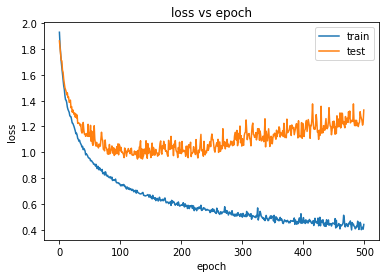

In [44]:
plt.plot(cnn1.history['loss'])
plt.plot(cnn1.history['val_loss'])
plt.title('loss vs epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

Text(0.5, 1.0, 'model vs epoch')

Text(0, 0.5, 'accuracy')

Text(0.5, 0, 'epoch')

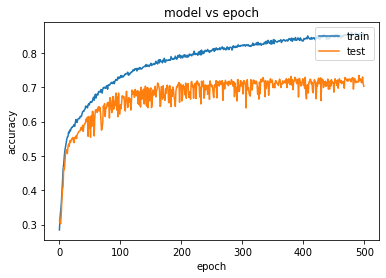

In [45]:
plt.plot(cnn1.history['accuracy'])
plt.plot(cnn1.history['val_accuracy'])
plt.title('model vs epoch')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [46]:
Melpredictions = modelMel.predict(xmel_testcnn)
Melpredictions.shape
#np.argmax(modelMel.predict(xmel_testcnn),axis=-1)

(1129, 7)

In [47]:
ymel_testcnn

array([3, 6, 2, ..., 3, 0, 1])

In [48]:
modelMel.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 128, 1)]          0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 126, 64)           256       
_________________________________________________________________
dense_4 (Dense)              (None, 126, 64)           4160      
_________________________________________________________________
dropout_3 (Dropout)          (None, 126, 64)           0         
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 31, 64)            0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 29, 128)           24704     
_________________________________________________________________
dense_5 (Dense)              (None, 29, 128)           1651

In [50]:
tsne_Melfeatures=tsne.fit_transform(modelMel.predict(x1))
tsne_Melfeatures.shape
tsne_Melfeatures[:,0]

(5644, 2)

array([107.07181 ,  39.418217,  40.915646, ...,   4.752099,  15.638285,
        54.42757 ], dtype=float32)

<AxesSubplot:>

<function matplotlib.pyplot.show(close=None, block=None)>

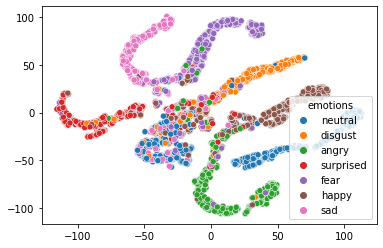

In [51]:
sns.scatterplot(x=tsne_Melfeatures[:,0],y=tsne_Melfeatures[:,1],hue=y,data=modelMel.predict(x1))
plt.show

In [52]:
from sklearn.metrics import classification_report
#report = classification_report(ymel_testcnn, Melpredictions)
#print(report)
# 0 = neutral,1 = happy, 2 = sad, 3 = angry, 4 = fear, 5 = digust, 6 = surprised,

In [53]:
loss, acc = modelMel.evaluate(xmel_testcnn, ymel_testcnn)
print("model, accuracy: {:5.2f}%".format(100*acc))

36/36 [==============================] - 0s 3ms/step - loss: 1.3277 - accuracy: 0.7024
model, accuracy: 70.24%


In [54]:
from keras import backend as K

#MeloutputLayer=modelMel.layers[13].output
modelMel.predict(xmel_testcnn).round(1)
modelMel.predict(xmel_testcnn).shape

array([[0. , 0.1, 0. , ..., 0. , 0.7, 0.1],
       [0. , 0. , 0. , ..., 0. , 0. , 1. ],
       [0. , 0.1, 0. , ..., 0. , 0.8, 0. ],
       ...,
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 1. , 0. ],
       [0. , 1. , 0. , ..., 0. , 0. , 0. ]], dtype=float32)

(1129, 7)

In [ ]:
#from keras import backend as K

#outputLayer=model.layers[13].output
#model.predict(x_testcnn).round(1)
#model.predict(x_testcnn).round(1).shape

In [ ]:
#modelMel.save('E:/testingMel_model.h5')

In [ ]:
#inputLayer=model.layers[13].output
#inputLayer.shape
#inputMFCC=model.layers[13].output
#inputLayer
#MelinputLayer=modelMel.layers[13].output
#MelinputLayer.shape
#MelinputLayer

In [55]:
#Fusion
mfccinp=keras.Input(shape=(None, 7))
melinp=keras.Input(shape=(None, 7))
fusion = Concatenate()([mfccinp, melinp])
#fuseOut=Average()(fusion)
fuseOut=Dense(7,activation="softmax")(fusion)
fuseF=Flatten()(fuseOut)

#model.output
#modelMel.output

In [ ]:
#newFusionModel=Model([model.layers[13].input,modelMel.layer[13].input],outputs=fuseOut)

In [56]:
fusionModel= Model(inputs=[mfccinp,melinp], outputs=fuseF)

In [57]:
fusionModel.compile(loss='sparse_categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
predictions.shape
Melpredictions.shape
y_testcnn.shape

(1129, 7)

(1129, 7)

(1129,)

In [58]:
fusionLayer=fusionModel.fit([model.predict(x_traincnn),modelMel.predict(xmel_traincnn)],np.array(y_traincnn),batch_size=16,epochs=500,validation_data=([model.predict(x_testcnn),modelMel.predict(xmel_testcnn)], ymel_testcnn))

Epoch 1/500
283/283 [==============================] - 1s 1ms/step - loss: 2.1161 - accuracy: 0.0263 - val_loss: 2.0403 - val_accuracy: 0.0496
Epoch 2/500
283/283 [==============================] - 0s 915us/step - loss: 2.0740 - accuracy: 0.0268 - val_loss: 2.0114 - val_accuracy: 0.0514
Epoch 3/500
283/283 [==============================] - 0s 954us/step - loss: 2.0330 - accuracy: 0.0387 - val_loss: 1.9827 - val_accuracy: 0.0593
Epoch 4/500
283/283 [==============================] - 0s 912us/step - loss: 2.0055 - accuracy: 0.0403 - val_loss: 1.9543 - val_accuracy: 0.0735
Epoch 5/500
283/283 [==============================] - 0s 787us/step - loss: 1.9669 - accuracy: 0.1110 - val_loss: 1.9261 - val_accuracy: 0.1284
Epoch 6/500
283/283 [==============================] - 0s 816us/step - loss: 1.9296 - accuracy: 0.1458 - val_loss: 1.8982 - val_accuracy: 0.1355
Epoch 7/500
283/283 [==============================] - 0s 848us/step - loss: 1.8951 - accuracy: 0.1338 - val_loss: 1.8703 - val_accu

283/283 [==============================] - 0s 897us/step - loss: 0.8226 - accuracy: 0.9944 - val_loss: 1.0304 - val_accuracy: 0.8415
Epoch 45/500
283/283 [==============================] - 0s 795us/step - loss: 0.7952 - accuracy: 0.9967 - val_loss: 1.0138 - val_accuracy: 0.8415
Epoch 46/500
283/283 [==============================] - 0s 812us/step - loss: 0.7751 - accuracy: 0.9953 - val_loss: 0.9975 - val_accuracy: 0.8423
Epoch 47/500
283/283 [==============================] - 0s 883us/step - loss: 0.7568 - accuracy: 0.9987 - val_loss: 0.9817 - val_accuracy: 0.8423
Epoch 48/500
283/283 [==============================] - 0s 901us/step - loss: 0.7326 - accuracy: 0.9979 - val_loss: 0.9660 - val_accuracy: 0.8423
Epoch 49/500
283/283 [==============================] - 0s 816us/step - loss: 0.7155 - accuracy: 0.9985 - val_loss: 0.9509 - val_accuracy: 0.8432
Epoch 50/500
283/283 [==============================] - 0s 915us/step - loss: 0.6901 - accuracy: 0.9989 - val_loss: 0.9360 - val_accuracy

283/283 [==============================] - 0s 1ms/step - loss: 0.1601 - accuracy: 0.9998 - val_loss: 0.5505 - val_accuracy: 0.8468
Epoch 101/500
283/283 [==============================] - 0s 1ms/step - loss: 0.1585 - accuracy: 0.9995 - val_loss: 0.5479 - val_accuracy: 0.8468
Epoch 102/500
283/283 [==============================] - 0s 972us/step - loss: 0.1520 - accuracy: 0.9988 - val_loss: 0.5453 - val_accuracy: 0.8468
Epoch 103/500
283/283 [==============================] - 0s 812us/step - loss: 0.1469 - accuracy: 0.9999 - val_loss: 0.5429 - val_accuracy: 0.8468
Epoch 104/500
283/283 [==============================] - 0s 1ms/step - loss: 0.1463 - accuracy: 0.9998 - val_loss: 0.5406 - val_accuracy: 0.8468
Epoch 105/500
283/283 [==============================] - 0s 1ms/step - loss: 0.1441 - accuracy: 0.9999 - val_loss: 0.5385 - val_accuracy: 0.8468
Epoch 106/500
283/283 [==============================] - 0s 780us/step - loss: 0.1368 - accuracy: 0.9995 - val_loss: 0.5364 - val_accuracy: 

283/283 [==============================] - 0s 933us/step - loss: 0.0411 - accuracy: 1.0000 - val_loss: 0.5146 - val_accuracy: 0.8450
Epoch 157/500
283/283 [==============================] - 0s 897us/step - loss: 0.0398 - accuracy: 1.0000 - val_loss: 0.5152 - val_accuracy: 0.8450
Epoch 158/500
283/283 [==============================] - 0s 1ms/step - loss: 0.0397 - accuracy: 0.9999 - val_loss: 0.5157 - val_accuracy: 0.8450
Epoch 159/500
283/283 [==============================] - 0s 901us/step - loss: 0.0387 - accuracy: 0.9999 - val_loss: 0.5162 - val_accuracy: 0.8450
Epoch 160/500
283/283 [==============================] - 0s 1ms/step - loss: 0.0371 - accuracy: 1.0000 - val_loss: 0.5168 - val_accuracy: 0.8450
Epoch 161/500
283/283 [==============================] - 0s 1ms/step - loss: 0.0376 - accuracy: 0.9998 - val_loss: 0.5174 - val_accuracy: 0.8450
Epoch 162/500
283/283 [==============================] - 0s 929us/step - loss: 0.0377 - accuracy: 0.9995 - val_loss: 0.5180 - val_accuracy

Epoch 212/500
283/283 [==============================] - 0s 883us/step - loss: 0.0155 - accuracy: 0.9997 - val_loss: 0.5619 - val_accuracy: 0.8459
Epoch 213/500
283/283 [==============================] - 0s 915us/step - loss: 0.0136 - accuracy: 0.9999 - val_loss: 0.5630 - val_accuracy: 0.8459
Epoch 214/500
283/283 [==============================] - 0s 912us/step - loss: 0.0140 - accuracy: 1.0000 - val_loss: 0.5640 - val_accuracy: 0.8459
Epoch 215/500
283/283 [==============================] - 0s 830us/step - loss: 0.0145 - accuracy: 0.9997 - val_loss: 0.5651 - val_accuracy: 0.8459
Epoch 216/500
283/283 [==============================] - 0s 826us/step - loss: 0.0135 - accuracy: 0.9999 - val_loss: 0.5661 - val_accuracy: 0.8459
Epoch 217/500
283/283 [==============================] - 0s 819us/step - loss: 0.0144 - accuracy: 0.9995 - val_loss: 0.5672 - val_accuracy: 0.8459
Epoch 218/500
283/283 [==============================] - 0s 812us/step - loss: 0.0137 - accuracy: 0.9998 - val_loss: 0

Epoch 268/500
283/283 [==============================] - 0s 1ms/step - loss: 0.0063 - accuracy: 0.9999 - val_loss: 0.6242 - val_accuracy: 0.8450
Epoch 269/500
283/283 [==============================] - 0s 869us/step - loss: 0.0060 - accuracy: 0.9998 - val_loss: 0.6253 - val_accuracy: 0.8450
Epoch 270/500
283/283 [==============================] - 0s 887us/step - loss: 0.0068 - accuracy: 0.9995 - val_loss: 0.6265 - val_accuracy: 0.8450
Epoch 271/500
283/283 [==============================] - 0s 912us/step - loss: 0.0070 - accuracy: 0.9995 - val_loss: 0.6276 - val_accuracy: 0.8450
Epoch 272/500
283/283 [==============================] - 0s 830us/step - loss: 0.0069 - accuracy: 0.9995 - val_loss: 0.6288 - val_accuracy: 0.8450
Epoch 273/500
283/283 [==============================] - 0s 811us/step - loss: 0.0062 - accuracy: 0.9997 - val_loss: 0.6299 - val_accuracy: 0.8450
Epoch 274/500
283/283 [==============================] - 0s 815us/step - loss: 0.0060 - accuracy: 0.9998 - val_loss: 0.6

Epoch 324/500
283/283 [==============================] - 0s 766us/step - loss: 0.0036 - accuracy: 0.9997 - val_loss: 0.6888 - val_accuracy: 0.8450
Epoch 325/500
283/283 [==============================] - 0s 787us/step - loss: 0.0029 - accuracy: 0.9999 - val_loss: 0.6900 - val_accuracy: 0.8450
Epoch 326/500
283/283 [==============================] - 0s 777us/step - loss: 0.0030 - accuracy: 0.9999 - val_loss: 0.6912 - val_accuracy: 0.8450
Epoch 327/500
283/283 [==============================] - 0s 807us/step - loss: 0.0029 - accuracy: 0.9999 - val_loss: 0.6923 - val_accuracy: 0.8450
Epoch 328/500
283/283 [==============================] - 0s 887us/step - loss: 0.0035 - accuracy: 0.9996 - val_loss: 0.6934 - val_accuracy: 0.8450
Epoch 329/500
283/283 [==============================] - 0s 801us/step - loss: 0.0037 - accuracy: 0.9995 - val_loss: 0.6946 - val_accuracy: 0.8450
Epoch 330/500
283/283 [==============================] - 0s 939us/step - loss: 0.0035 - accuracy: 0.9996 - val_loss: 0

Epoch 380/500
283/283 [==============================] - 0s 802us/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.7527 - val_accuracy: 0.8459
Epoch 381/500
283/283 [==============================] - 0s 802us/step - loss: 0.0038 - accuracy: 0.9990 - val_loss: 0.7538 - val_accuracy: 0.8459
Epoch 382/500
283/283 [==============================] - 0s 869us/step - loss: 0.0020 - accuracy: 0.9999 - val_loss: 0.7550 - val_accuracy: 0.8459
Epoch 383/500
283/283 [==============================] - 0s 961us/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.7561 - val_accuracy: 0.8459
Epoch 384/500
283/283 [==============================] - 0s 912us/step - loss: 0.0028 - accuracy: 0.9994 - val_loss: 0.7572 - val_accuracy: 0.8459
Epoch 385/500
283/283 [==============================] - 0s 855us/step - loss: 0.0022 - accuracy: 0.9996 - val_loss: 0.7583 - val_accuracy: 0.8459
Epoch 386/500
283/283 [==============================] - 0s 883us/step - loss: 0.0021 - accuracy: 0.9997 - val_loss: 0

283/283 [==============================] - 0s 901us/step - loss: 8.4361e-04 - accuracy: 1.0000 - val_loss: 0.8136 - val_accuracy: 0.8477
Epoch 436/500
283/283 [==============================] - 0s 919us/step - loss: 0.0012 - accuracy: 0.9998 - val_loss: 0.8147 - val_accuracy: 0.8477
Epoch 437/500
283/283 [==============================] - 0s 922us/step - loss: 0.0015 - accuracy: 0.9997 - val_loss: 0.8158 - val_accuracy: 0.8477
Epoch 438/500
283/283 [==============================] - 0s 821us/step - loss: 0.0020 - accuracy: 0.9995 - val_loss: 0.8169 - val_accuracy: 0.8477
Epoch 439/500
283/283 [==============================] - 0s 798us/step - loss: 0.0013 - accuracy: 0.9998 - val_loss: 0.8179 - val_accuracy: 0.8477
Epoch 440/500
283/283 [==============================] - 0s 798us/step - loss: 0.0011 - accuracy: 0.9999 - val_loss: 0.8190 - val_accuracy: 0.8477
Epoch 441/500
283/283 [==============================] - 0s 796us/step - loss: 9.7230e-04 - accuracy: 0.9999 - val_loss: 0.8201 

283/283 [==============================] - 0s 854us/step - loss: 0.0032 - accuracy: 0.9988 - val_loss: 0.8722 - val_accuracy: 0.8468
Epoch 491/500
283/283 [==============================] - 0s 869us/step - loss: 7.8944e-04 - accuracy: 0.9999 - val_loss: 0.8732 - val_accuracy: 0.8468
Epoch 492/500
283/283 [==============================] - 0s 780us/step - loss: 4.7579e-04 - accuracy: 1.0000 - val_loss: 0.8744 - val_accuracy: 0.8468
Epoch 493/500
283/283 [==============================] - 0s 823us/step - loss: 0.0015 - accuracy: 0.9996 - val_loss: 0.8755 - val_accuracy: 0.8468
Epoch 494/500
283/283 [==============================] - 0s 862us/step - loss: 8.9422e-04 - accuracy: 0.9999 - val_loss: 0.8764 - val_accuracy: 0.8468
Epoch 495/500
283/283 [==============================] - 0s 894us/step - loss: 6.4222e-04 - accuracy: 0.9999 - val_loss: 0.8775 - val_accuracy: 0.8468
Epoch 496/500
283/283 [==============================] - 0s 844us/step - loss: 8.4670e-04 - accuracy: 0.9998 - val_l

In [72]:
fusionModel.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, None, 7)]    0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, None, 7)]    0                                            
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, None, 14)     0           input_3[0][0]                    
                                                                 input_4[0][0]                    
__________________________________________________________________________________________________
dense_8 (Dense)                 (None, None, 7)      105         concatenate[0][0]          

Text(0.5, 1.0, 'model vs epoch')

Text(0, 0.5, 'accuracy')

Text(0.5, 0, 'epoch')

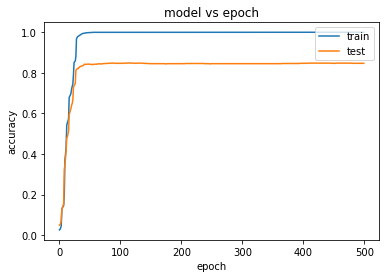

In [59]:
plt.plot(fusionLayer.history['accuracy'])
plt.plot(fusionLayer.history['val_accuracy'])
plt.title('model vs epoch')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [60]:
loss, acc = fusionModel.evaluate([model.predict(x_testcnn),modelMel.predict(xmel_testcnn)], ymel_testcnn)
print("model, accuracy: {:5.2f}%".format(100*acc))

36/36 [==============================] - 0s 543us/step - loss: 0.8827 - accuracy: 0.8468
model, accuracy: 84.68%


In [61]:
test_predicts=fusionModel.predict([model.predict(x_testcnn),modelMel.predict(xmel_testcnn)]).round(1)
test_predicts

array([[0. , 0. , 0.9, ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 1. ],
       [0. , 0. , 0. , ..., 0. , 1. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [1. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 1. , 0. , ..., 0. , 0. , 0. ]], dtype=float32)

In [62]:
train_predicts=fusionModel.predict([model.predict(x_traincnn),modelMel.predict(xmel_traincnn)]).round(1)
train_predicts

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [ ]:
#modelMel.save('E:/testingFusion_model.h5')

In [63]:
all_predicts=fusionModel.predict([model.predict(x),modelMel.predict(x1)]).round(1)
all_predicts

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [64]:
emotionsTypes=['neutral','happy','sad','angry','fear','digust','surprised']

In [65]:
emoList=[]
for i in range(0,4515):
    emoList.append(emotionsTypes[np.argmax(train_predicts,axis=1)[i]])
emoList=np.asarray(emoList)
emoList

array(['neutral', 'digust', 'angry', ..., 'fear', 'happy', 'surprised'],
      dtype='<U9')

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(learning_rate=200.0, n_iter=2000,perplexity=25.0)

In [66]:
#newdf_num=newdf.drop('label',axis=1) # My dataset with emotion label removed
#newdf.shape,newdf_num.shape 
tsne_features=tsne.fit_transform(all_predicts)
tsne_features.shape
tsne_features[:,0]

(5644, 2)

array([-35.13682  , -20.982613 ,  41.464275 , ...,  42.49772  ,
       -36.249134 ,   0.9390313], dtype=float32)

<AxesSubplot:>

<function matplotlib.pyplot.show(close=None, block=None)>

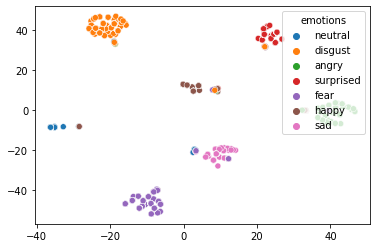

In [67]:
sns.scatterplot(x=tsne_features[:,0],y=tsne_features[:,1],hue=y,data=all_predicts)
plt.show